# Business Problem

Predict the price of Laptops based on various features.

# Data Exploration and Data Understanding

### Importing Libraries

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data Preprocessing

In [130]:
df = pd.read_csv("/Users/umakantmanore/Desktop/amu/Dev_Enviroment2023/test_env/ML-Capstone/laptop.csv")

In [131]:
df.head(2)

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [132]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price'],
      dtype='object')

### Data Cleaning

In [133]:
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1, inplace = True)
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [134]:
df.shape

(1303, 11)

In [135]:
df.isnull().sum()

Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [136]:
df.dropna(axis=0, how='all',inplace=True)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 119.3+ KB


 OBSERVATION:

1303 rows with 11 features.

There are 30 missing values. Hence, dropped the null values. Only 1273 rows left now

All the features except 'Price' is of 'object' datatype.

In [138]:
df[['Company', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price']].nunique()

Company              19
TypeName              6
Inches               25
ScreenResolution     40
Cpu                 118
Ram                  10
Memory               40
Gpu                 110
OpSys                 9
Weight              189
Price               777
dtype: int64

In [139]:
for columns in df.columns:
  if columns != 'Price':
    print(f"Unique values of {columns} : \n {df[columns].unique()}")
    print('\n')

Unique values of Company : 
 ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']


Unique values of TypeName : 
 ['Ultrabook' 'Notebook' 'Gaming' '2 in 1 Convertible' 'Workstation'
 'Netbook']


Unique values of Inches : 
 ['13.3' '15.6' '15.4' '14' '12' '17.3' '13.5' '12.5' '13' '18.4' '13.9'
 '11.6' '25.6' '35.6' '12.3' '27.3' '24' '33.5' '?' '31.6' '17' '15'
 '14.1' '11.3' '10.1']


Unique values of ScreenResolution : 
 ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 1920x1080' 'Touchscreen / Quad HD+ 3200x1800'
 'Touchscreen 2256x1504' 'Quad HD+ / Touchscreen 3200x1800'
 'IPS Panel 1366x768' 'IPS Panel 4K Ultra HD / Touchscreen 3840x2160'
 'IPS Panel Full HD 2160x1440' '4

In [140]:
# Create a mask to identify "?" in the DataFrame
mask = df.applymap(lambda x: x == "?")

# Get rows containing "?"
rows_with_question_mark = df[mask.any(axis=1)]

# Get columns containing "?"
columns_with_question_mark = df.loc[:, mask.any(axis=0)]

In [141]:
print(rows_with_question_mark)

    Company     TypeName Inches   ScreenResolution  \
208    Dell    Ultrabook   13.3  Full HD 1920x1080   
476    Dell  Workstation      ?  Full HD 1920x1080   
770    Dell     Notebook   15.6  Full HD 1920x1080   

                             Cpu   Ram     Memory                     Gpu  \
208   Intel Core i7 8550U 1.8GHz   8GB  256GB SSD  Intel UHD Graphics 620   
476  Intel Core i7 7700HQ 2.8GHz   8GB  256GB SSD     Nvidia Quadro M1200   
770   Intel Core i7 7500U 2.7GHz  16GB          ?      AMD Radeon R7 M445   

          OpSys  Weight        Price  
208  Windows 10       ?   77202.7200  
476  Windows 10  1.78kg  128298.2400  
770  Windows 10   2.3kg   62938.0656  


In [142]:
# Replace "?" with NaN
df.replace("?", np.nan, inplace=True)

# Print the number of missing values in each column
print(df.isna().sum())

# Impute categorical columns with mode
for column in df.select_dtypes(include=[object]).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

print("Updated DataFrame:")
print(df.loc[[208,476,770]])

Company             0
TypeName            0
Inches              1
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              1
Gpu                 0
OpSys               0
Weight              1
Price               0
dtype: int64
Updated DataFrame:
    Company     TypeName Inches   ScreenResolution  \
208    Dell    Ultrabook   13.3  Full HD 1920x1080   
476    Dell  Workstation   15.6  Full HD 1920x1080   
770    Dell     Notebook   15.6  Full HD 1920x1080   

                             Cpu   Ram     Memory                     Gpu  \
208   Intel Core i7 8550U 1.8GHz   8GB  256GB SSD  Intel UHD Graphics 620   
476  Intel Core i7 7700HQ 2.8GHz   8GB  256GB SSD     Nvidia Quadro M1200   
770   Intel Core i7 7500U 2.7GHz  16GB  256GB SSD      AMD Radeon R7 M445   

          OpSys  Weight        Price  
208  Windows 10   2.2kg   77202.7200  
476  Windows 10  1.78kg  128298.2400  
770  Windows 10   2.3kg   62938.0656  


OBSERVATION:

There are '?' values in columns: Inches, Memory and Weight. Dropped the rows containing '?'.

In [143]:
df['Ram']= df['Ram'].str.replace('GB',"").astype('int')
df['Weight'] = df['Weight'].str.replace('kg',"").astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int64  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   float64
 10  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 151.6+ KB


RAM and Weight is converted into numerical values from categorical.

## EDA and Feature Engineering

### 1. Company

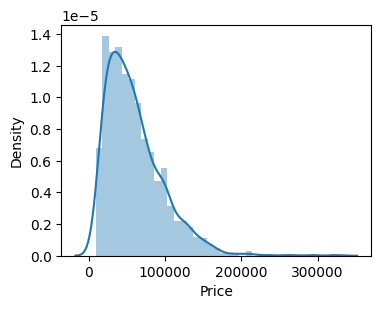

In [144]:
plt.figure(figsize=(4,3))
sns.distplot(df['Price'])
plt.show()

<Axes: xlabel='Company'>

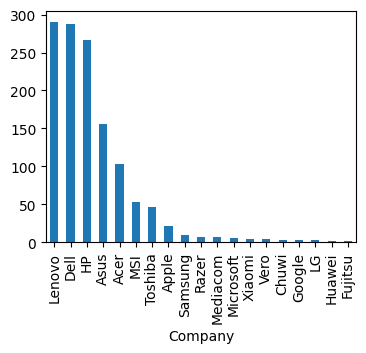

In [145]:
df['Company'].value_counts().plot(kind='bar',figsize=(4,3))

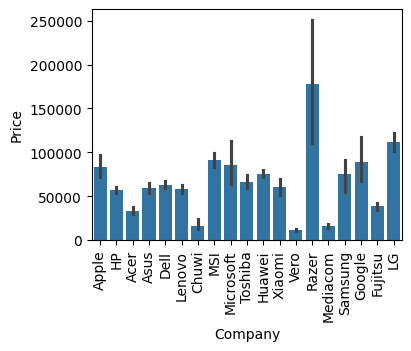

In [146]:
plt.figure(figsize=(4,3))
sns.barplot(x=df['Company'], y = df['Price'])
plt.xticks(rotation=90)
plt.show()

Companies like Razer, LG, Apple is priced higher. However, Lenovo, Dell, HP has been ordered more in comparison to the costlier Laptops.

### 2. TypeName

<Axes: xlabel='TypeName'>

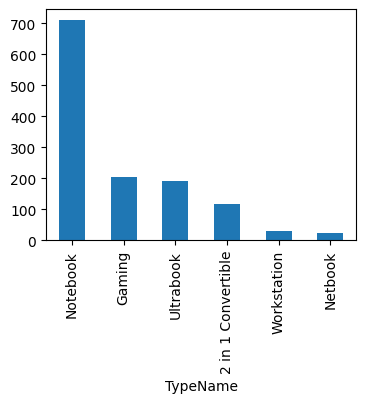

In [147]:
df['TypeName'].value_counts().plot(kind='bar', figsize=(4,3))

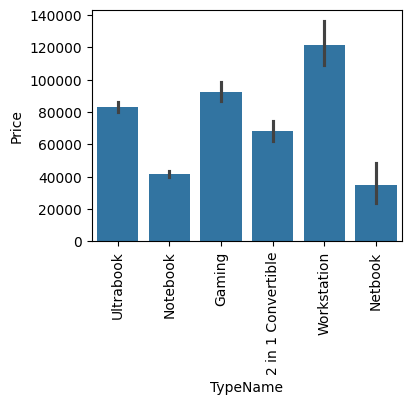

In [148]:
plt.figure(figsize=(4,3))
sns.barplot(x=df['TypeName'], y=df['Price'])
plt.xticks(rotation = 90)
plt.show()

It can be noted that Notebook being the least costlied has been ordered more often.

### 3. Inches

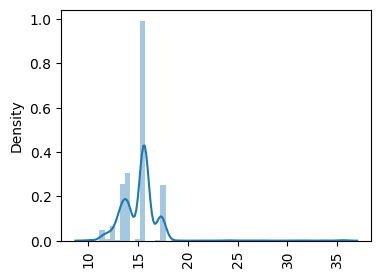

In [149]:
plt.figure(figsize=(4,3))
sns.distplot(x=df['Inches'])
plt.xticks(rotation=90)
plt.show()

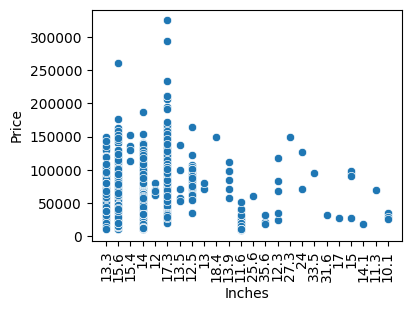

In [150]:
plt.figure(figsize=(4,3))
sns.scatterplot(x=df['Inches'], y=df['Price'])
plt.xticks(rotation=90)
plt.show()

Laptops with screen size around 15 inches is in higher demand, while laptops with 17 inches are on costlier edge.

### 4. ScreenResolution- Touchscreen

Exctracting whether the Screen is Touchscreen or not from ScreenResolution

In [151]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0


<Axes: xlabel='Touchscreen'>

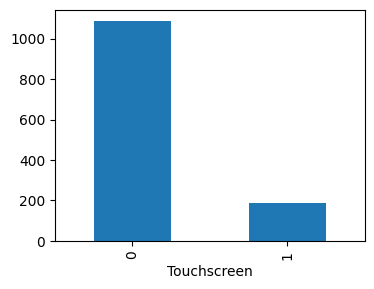

In [152]:
df['Touchscreen'].value_counts().plot(kind='bar', figsize=(4,3))

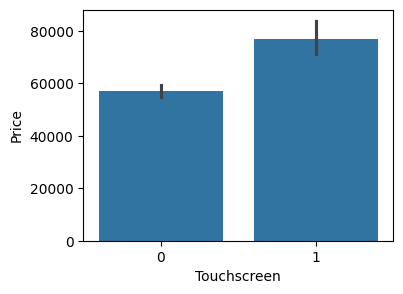

In [153]:
plt.figure(figsize=(4,3))
sns.barplot(x=df['Touchscreen'], y=df['Price'])
plt.show()

ScreenResolution column is used to determine whether the Laptop is TOouchscreen or not.
Higher demand for non touchscreen laptops. Touchscreen Laptops are as expected on costlier edge

### 5. ScreenResolution - IPS

Extracting whether Screen contains IPS technology or not

In [154]:
df['Ips'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0


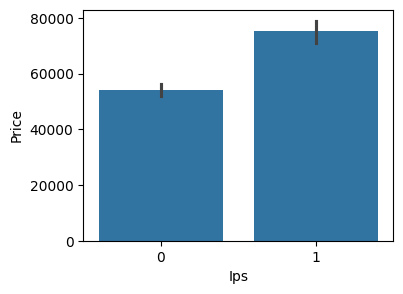

In [155]:
plt.figure(figsize=(4,3))
sns.barplot(x=df["Ips"],y=df["Price"])
plt.show()

IPS Display is derived from ScreenResolution column. IPS Display laptops are priced higher.

### 6. ScreenResolution

Extracting the width X and height Y from ScreenResolution column.

Then finding PPI pixel per inch by formula :  √(w² + h²)/inches

In [156]:
df['ScreenResolution'].head(2)

0    IPS Panel Retina Display 2560x1600
1                              1440x900
Name: ScreenResolution, dtype: object

In [157]:
temp = df['ScreenResolution'].str.split("x", n=1, expand = True)
df['X'] = temp[0]
df['Y_res'] = temp[1]
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900


In [158]:
df['X_res'] = df['X'].str.replace(',','').str.findall(r'\d+\.?\d+').apply(lambda x:x[0])
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X,Y_res,X_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600,2560
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,1440


In [159]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')
df['Inches'] = df['Inches'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int64  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   float64
 10  Price             1273 non-null   float64
 11  Touchscreen       1273 non-null   int64  
 12  Ips               1273 non-null   int64  
 13  X                 1273 non-null   object 
 14  Y_res             1273 non-null   int64  
 15  X_res             1273 non-null   int64  
dtypes: float64(3), int64(5), object(8)
memory usage

In [160]:
df['PPI'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

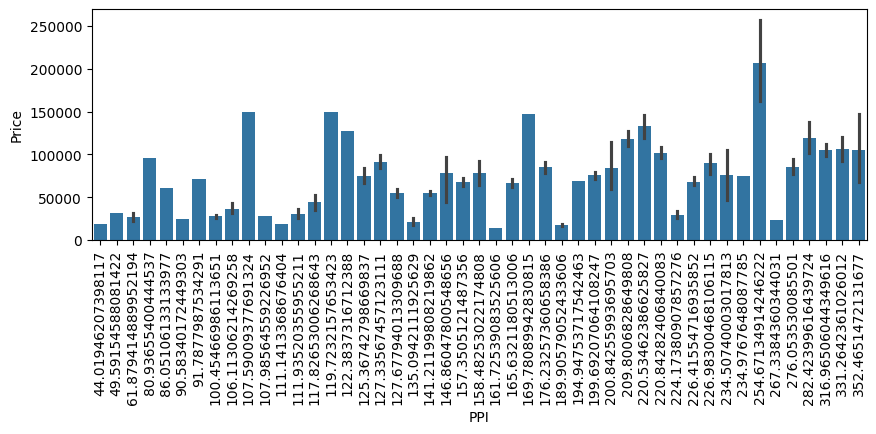

In [161]:
plt.figure(figsize=(10,3))
sns.barplot(x=df['PPI'], y=df['Price'])
plt.xticks(rotation = 90)
plt.show()

In [162]:
df.drop(columns=['ScreenResolution','X','X_res','Y_res','Inches'], axis=1, inplace = True)
df.head(2)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940


Pixels per Inches is derived from ScreenResolution and Inches columns. Hence dropping columns X_res, Y_res and Inches and also Screen Resolution since already used in PPI column. 

### 7. CPU

In [163]:
df['CPU Name'] = df['Cpu'].apply(lambda x: " ".join(x.split()[0:3]))
df.head(2)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,CPU Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5


In [164]:
df['CPU Name'].unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD A9-Series 9420',
       'Intel Core i3', 'Intel Core M', 'AMD E-Series E2-9000e',
       'Intel Atom x5-Z8300', 'AMD E-Series E2-6110',
       'AMD A6-Series 9220', 'Intel Celeron Dual', 'AMD Ryzen 1700',
       'Intel Pentium Quad', 'AMD FX 9830P', 'AMD E-Series 6110',
       'Intel Xeon E3-1505M', 'AMD E-Series 9000e',
       'AMD A10-Series A10-9620P', 'AMD A6-Series A6-9220',
       'AMD A10-Series 9600P', 'AMD A8-Series 7410',
       'AMD A12-Series 9720P', 'Intel Celeron Quad', 'AMD Ryzen 1600',
       'Intel Atom x5-Z8350', 'AMD A10-Series 9620P', 'AMD E-Series 7110',
       'AMD A9-Series A9-9420', 'Intel Xeon E3-1535M',
       'AMD E-Series E2-9000', 'AMD A6-Series 7310', 'Intel Atom Z8350',
       'Intel Pentium Dual', 'AMD A12-Series 9700P', 'AMD A4-Series 7210',
       'AMD FX 8800P', 'Intel Atom X5-Z8350', 'Intel Atom x5-Z8550',
       'Samsung Cortex A72&A53', 'AMD E-Series 9000',
       'AMD A9-Series 9410'], dtype=object)

In [165]:
def fetching_processor(text):
  if text== 'Intel Core i5' or text == 'Intel Core i7' or text == 'Intel Core i3':
    return text
  else:
    if 'Intel' in text:
      return 'Other Intel Processor'
    else:
      return 'AMD Processor'

In [166]:
df['CPU Brand'] = df['CPU Name'].apply(fetching_processor)

In [167]:
df.head(2)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,CPU Name,CPU Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5


<Axes: xlabel='CPU Brand'>

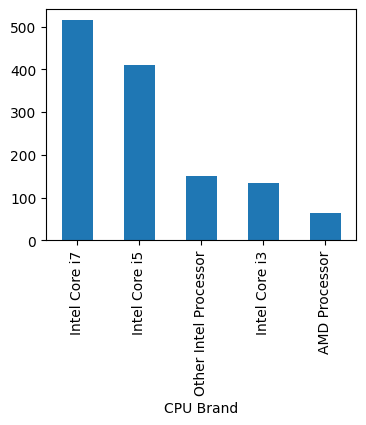

In [168]:
df['CPU Brand'].value_counts().plot(kind='bar', figsize=(4,3))

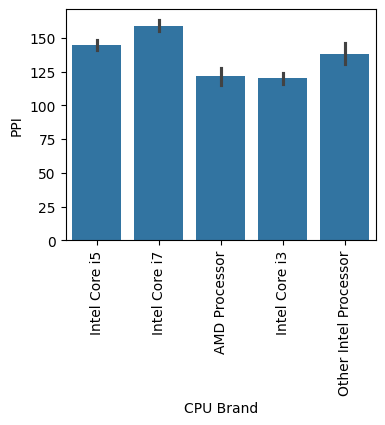

In [169]:
plt.figure(figsize=(4,3))
sns.barplot(x=df['CPU Brand'], y=df['PPI'])
plt.xticks(rotation=90)
plt.show()

Cpu type is cleaned further to CPU Brands of 5types. Intel Core i7 is costlier and is also in high demand.

In [170]:
df.drop(columns=['Cpu','CPU Name'],inplace=True)
df.head(2)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,CPU Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5


### 8. RAM

<Axes: xlabel='Ram'>

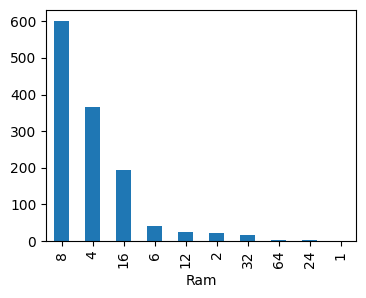

In [171]:
df['Ram'].value_counts().plot(kind='bar', figsize=(4,3))

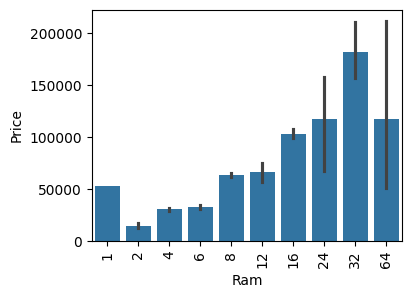

In [172]:
plt.figure(figsize=(4,3))
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

Price of RAM increases with increase in size but 64GB RAM is lesser price than 32GB RAM 

### 9. Memory

In [173]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '128GB SSD +  1TB HDD', '256GB SSD +  256GB SSD',
       '64GB Flash Storage', '32GB Flash Storage', '256GB SSD +  1TB HDD',
       '256GB SSD +  2TB HDD', '32GB SSD', '2TB HDD', '64GB SSD',
       '1.0TB Hybrid', '512GB SSD +  1TB HDD', '1TB SSD',
       '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [174]:

df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True) #replace 1.0 with 1
df["Memory"] = df["Memory"].str.replace('GB', '') #remove GD
df["Memory"] = df["Memory"].str.replace('TB', '000') #remove TB
temp = df["Memory"].str.split("+", n = 1, expand = True) #split Memory into columns on first occurance of '+'

df["first"]= temp[0]
df["first"]=df["first"].str.strip() #removing space trails

df["second"]= temp[1]

In [175]:
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)  #1 if HDD else 0 from 1st column of Memory splitted
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)  #1 if SSD else 0 from 1st column of Memory splitted
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0) ##1 if Hybrid else 0 from 1st column of Memory splitted
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0) #1 if Flashstorage else 0 from 1st column of Memory splitted

df["second"].fillna("0", inplace = True)
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)


In [176]:
#remove everything other than digits
df['first'] = df['first'].apply(lambda x: ''.join(filter(str.isdigit, x)))
df['second'] = df['second'].apply(lambda x: ''.join(filter(str.isdigit, x)))

In [177]:
# 1 or 0 * value in first column + 1 or 0 * value in second column
# Hence values of HDD, SSD, Hybrid and FlashStorage segreated into different columns from memory column
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

In [178]:
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage', 'Memory'],inplace=True)


df.head(2)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,CPU Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,,128,,
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,,,,128


In [179]:
print(df['HDD'].unique())
print(df['SSD'].unique())

['' '500' '1000' '2000' '10001000' '32' '128']
['128' '' '256' '512' '256256' '32' '64' '1000' '512512' '16' '512256'
 '180' '240' '8']


In [180]:
df['HDD'] = df['HDD'].replace('', '0').replace('10001000','1000')
df['SSD'] = df['SSD'].replace('', '0').replace('512512','512').replace('256256','256').replace('512256','256')
df['Hybrid'] = df['Hybrid'].replace('', '0')
df['Flash_Storage'] = df['Flash_Storage'].replace('', '0')

In [181]:
df["HDD"] = df["HDD"].astype(int)
df["SSD"] = df["SSD"].astype(int)
df["Hybrid"] = df["Hybrid"].astype(int)
df["Flash_Storage"] = df["Flash_Storage"].astype(int)

Memory column is divided into HDD, SSD, Hybrid and Flash_Storage columns. 

### 10. GPU

In [182]:
print(df['Gpu'].unique())
df['GPU Brand'] = df['Gpu'].apply(lambda x: x.split()[0])
df.head(2)

['Intel Iris Plus Graphics 640' 'Intel HD Graphics 6000'
 'Intel HD Graphics 620' 'AMD Radeon Pro 455'
 'Intel Iris Plus Graphics 650' 'AMD Radeon R5' 'Intel Iris Pro Graphics'
 'Nvidia GeForce MX150' 'Intel UHD Graphics 620' 'Intel HD Graphics 520'
 'AMD Radeon Pro 555' 'AMD Radeon R5 M430' 'Intel HD Graphics 615'
 'AMD Radeon Pro 560' 'Nvidia GeForce 940MX' 'Nvidia GeForce GTX 1050'
 'AMD Radeon R2' 'AMD Radeon 530' 'Nvidia GeForce 930MX'
 'Intel HD Graphics' 'Intel HD Graphics 500' 'Nvidia GeForce 930MX '
 'Nvidia GeForce GTX 1060' 'Nvidia GeForce 150MX'
 'Intel Iris Graphics 540' 'AMD Radeon RX 580' 'Nvidia GeForce 920MX'
 'AMD Radeon R4 Graphics' 'AMD Radeon 520' 'Nvidia GeForce GTX 1070'
 'Nvidia GeForce GTX 1050 Ti' 'Intel HD Graphics 400'
 'Nvidia GeForce MX130' 'AMD R4 Graphics' 'Nvidia GeForce GTX 940MX'
 'AMD Radeon RX 560' 'Nvidia GeForce 920M' 'AMD Radeon R7 M445'
 'AMD Radeon RX 550' 'Nvidia GeForce GTX 1050M' 'Intel HD Graphics 515'
 'AMD Radeon R5 M420' 'Intel HD Graphi

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,CPU Brand,HDD,SSD,Hybrid,Flash_Storage,GPU Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel


In [183]:
df['GPU Brand'].value_counts()

GPU Brand
Intel     703
Nvidia    393
AMD       176
ARM         1
Name: count, dtype: int64

In [184]:
df = df[df['GPU Brand']!= 'ARM']
df.drop(columns=['Gpu'], inplace = True)
df.head(1)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,PPI,CPU Brand,HDD,SSD,Hybrid,Flash_Storage,GPU Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel


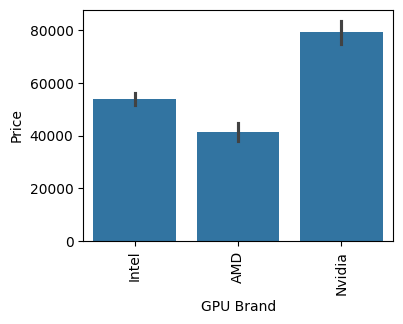

In [185]:
plt.figure(figsize=(4,3))
sns.barplot(x=df['GPU Brand'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

### 11. OpSys

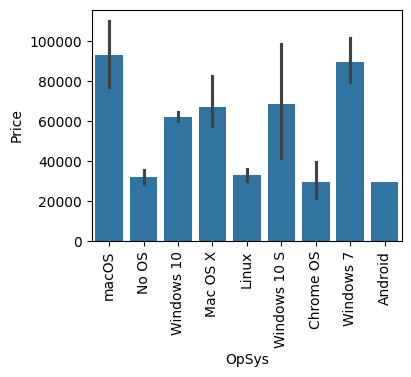

In [186]:
plt.figure(figsize=(4,3))
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [187]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux',
       'Windows 10 S', 'Chrome OS', 'Windows 7', 'Android'], dtype=object)

In [188]:
def os(text):
  if text == 'Windows 10' or text == 'Windows 10 S' or text == 'Windows 7':
    return 'Windows'
  elif text == 'macOS' or text =='Mac OS X':
    return 'Mac'
  else:
    return 'Others/ No OS/ Linux'

df['OS'] = df['OpSys'].apply(os)
df['OS'].unique()

array(['Mac', 'Others/ No OS/ Linux', 'Windows'], dtype=object)

In [189]:
df.drop(columns=['OpSys'],inplace=True)
df.head(2)

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,PPI,CPU Brand,HDD,SSD,Hybrid,Flash_Storage,GPU Brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel,Mac


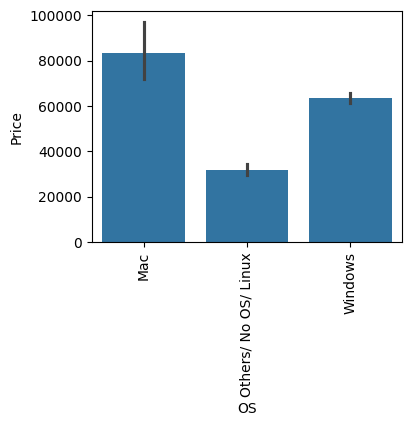

In [190]:
plt.figure(figsize=(4,3))
sns.barplot(x=df['OS'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

### 12. Weight

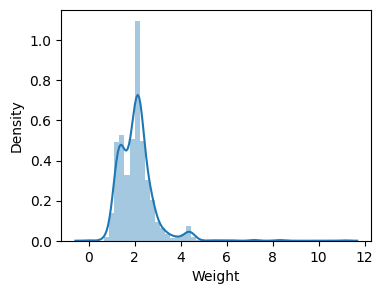

In [191]:
plt.figure(figsize=(4,3))
sns.distplot(df['Weight'])
plt.show()

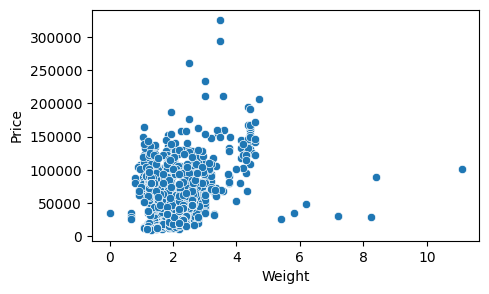

In [192]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=df['Weight'],y=df['Price'])
plt.show()

Price for Weights around 2 are in high demand and also pricey.

### 13. Price

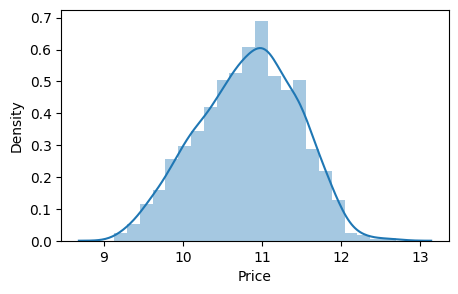

In [193]:
plt.figure(figsize=(5,3))
sns.distplot(np.log(df['Price']))
plt.show()

### Correlation and Heatmap

In [194]:
df.select_dtypes(include=['number']).corr()['Price']

Ram              0.685521
Weight           0.175486
Price            1.000000
Touchscreen      0.190738
Ips              0.255987
PPI              0.470554
HDD             -0.095064
SSD              0.674199
Hybrid           0.007794
Flash_Storage   -0.037881
Name: Price, dtype: float64

<Axes: >

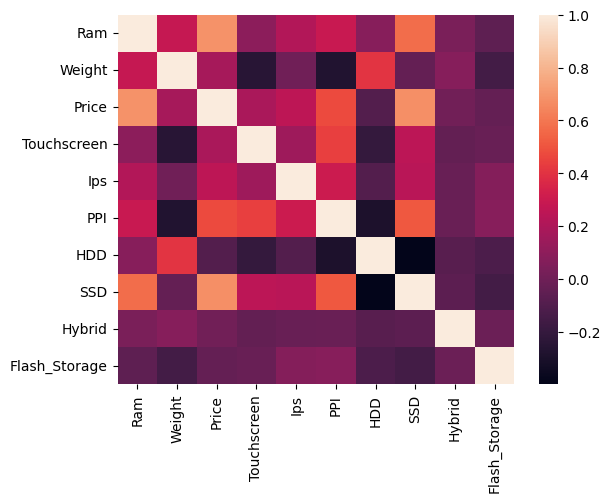

In [195]:
sns.heatmap(df.select_dtypes(include=['number']).corr())

Observations:

HDD, SSD, Hybrid, Flash_Storage:

These features show no significant correlation with any other features or the target variable 'Price'.

However, before dropping these columns it would be better to do a cross check with RandomForestRegressor to determine the important features

# Feature Selection

LabelEncoder is used to convert categorical to numerical values.Then RandomForestRegressor is applied to the whole dataset get the important features from it. Then insignificant features are dropped after comparing from the correlation matrix results from above and important features list from below.

In [196]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Convert categorical variables into numerical using label encoding
label_encoder = LabelEncoder()
data = df.copy()
for column in ['Company', 'TypeName', 'CPU Brand', 'GPU Brand', 'OS']:
    data[column] = label_encoder.fit_transform(data[column])

# Split data into features and target variable
X = data.drop(columns=['Price'])
y = data['Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_regressor.feature_importances_
features = X.columns

# Create dataframe to display feature importances
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


          Feature  Importance
2             Ram    0.558108
3          Weight    0.134931
6             PPI    0.071149
1        TypeName    0.058393
9             SSD    0.049056
0         Company    0.045603
7       CPU Brand    0.039384
5             Ips    0.011133
12      GPU Brand    0.010226
8             HDD    0.008075
13             OS    0.007236
4     Touchscreen    0.005933
11  Flash_Storage    0.000671
10         Hybrid    0.000102


It is safe to say that Flash_Storage and Hybrid are least significant on considering outputs from Correlation Matrix and Important features list from RandomForestRegressor.

Hence dropping those columns.

In [197]:
df.drop(columns = ['Flash_Storage','Hybrid'], axis =1, inplace = True)
df.head(2)

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,PPI,CPU Brand,HDD,SSD,GPU Brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac


# Model Development

In [198]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

print(X.head(2))
print('\n')
print(y.head(2))

  Company   TypeName  Ram  Weight  Touchscreen  Ips         PPI  \
0   Apple  Ultrabook    8    1.37            0    1  226.983005   
1   Apple  Ultrabook    8    1.34            0    0  127.677940   

       CPU Brand  HDD  SSD GPU Brand   OS  
0  Intel Core i5    0  128     Intel  Mac  
1  Intel Core i5    0    0     Intel  Mac  


0    11.175755
1    10.776777
Name: Price, dtype: float64


In [199]:
df.head(2)

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,PPI,CPU Brand,HDD,SSD,GPU Brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac


In [200]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15, random_state=42)

In [201]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

In [202]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor

In [203]:
step1 = ColumnTransformer(
          transformers = [
              ('col_tnf', OneHotEncoder(sparse =False, drop='first'), ['Company','TypeName','CPU Brand', 'GPU Brand', 'OS'])
              ]
)

In [204]:
models = {'Linear Regression':Lasso(alpha=0.01),
          'K-Nearest Neighbour':KNeighborsRegressor(n_neighbors=3),
          'Decision Tree':DecisionTreeRegressor(max_depth=8),
          'Support Vector Machine': SVR(kernel="rbf",C=10000,epsilon=0.1),
          'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15),
          'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100,max_features=0.5),
          }

for key, model in models.items():
  pipe = Pipeline(
      [('step1', step1),
       ('step2',model)]
        )
  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_test)
  print(f"{key}")
  print(f'R2 Score: {r2_score(y_test, y_pred)}')
  print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')
  print('\n')

Linear Regression
R2 Score: 0.7406660931720511
Mean Absolute Error: 0.2546439850105413


K-Nearest Neighbour
R2 Score: 0.6497465677047046
Mean Absolute Error: 0.2709415526489369


Decision Tree
R2 Score: 0.7139363555035866
Mean Absolute Error: 0.25579534941221027


Support Vector Machine
R2 Score: 0.7388380213231505
Mean Absolute Error: 0.24239300407755854


Random Forest Regressor
R2 Score: 0.7409627710135351
Mean Absolute Error: 0.24474145406901285


Gradient Boosting Regressor
R2 Score: 0.7643793441248502
Mean Absolute Error: 0.23507027546259696




From the provided results, the Gradient Boosting Regressor has the highest R2 score (0.7689) and the lowest MAE (0.2333), indicating that it performs the best among the given models. Therefore, the Gradient Boosting Regressor might be considered the best model in this case.

# Hyperparameter Tuning

In [205]:
from sklearn.model_selection import RandomizedSearchCV
import pickle

In [206]:
model = GradientBoostingRegressor()

param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'regressor__max_depth': [3, 4, 5, 6],
    'regressor__subsample': [0.6, 0.8, 1.0],
    'regressor__max_features': [0.6, 0.8, 1.0]
}

pipe = Pipeline([
    ('preprocessor', step1),
    ('regressor', model)
])

# Perform Grid Search
grid_search = RandomizedSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2, random_state=42)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Best Model Parameters: {grid_search.best_params_}')
print(f'R2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

[CV] END regressor__learning_rate=0.2, regressor__max_depth=6, regressor__max_features=1.0, regressor__n_estimators=100, regressor__subsample=0.8; total time=   0.2s
[CV] END regressor__learning_rate=0.2, regressor__max_depth=6, regressor__max_features=1.0, regressor__n_estimators=100, regressor__subsample=0.8; total time=   0.2s
[CV] END regressor__learning_rate=0.2, regressor__max_depth=6, regressor__max_features=1.0, regressor__n_estimators=100, regressor__subsample=0.8; total time=   0.2s
[CV] END regressor__learning_rate=0.2, regressor__max_depth=6, regressor__max_features=1.0, regressor__n_estimators=100, regressor__subsample=0.8; total time=   0.2s
[CV] END regressor__learning_rate=0.2, regressor__max_depth=6, regressor__max_features=1.0, regressor__n_estimators=100, regressor__subsample=0.8; total time=   0.2s


/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

[CV] END regressor__learning_rate=0.01, regressor__max_depth=5, regressor__max_features=1.0, regressor__n_estimators=200, regressor__subsample=0.6; total time=   0.3s
[CV] END regressor__learning_rate=0.01, regressor__max_depth=5, regressor__max_features=1.0, regressor__n_estimators=200, regressor__subsample=0.6; total time=   0.3s
[CV] END regressor__learning_rate=0.05, regressor__max_depth=5, regressor__max_features=1.0, regressor__n_estimators=100, regressor__subsample=0.6; total time=   0.2s
[CV] END regressor__learning_rate=0.01, regressor__max_depth=5, regressor__max_features=1.0, regressor__n_estimators=200, regressor__subsample=0.6; total time=   0.3s
[CV] END regressor__learning_rate=0.05, regressor__max_depth=5, regressor__max_features=1.0, regressor__n_estimators=100, regressor__subsample=0.6; total time=   0.2s
[CV] END regressor__learning_rate=0.01, regressor__max_depth=5, regressor__max_features=1.0, regressor__n_estimators=200, regressor__subsample=0.6; total time=   0.3

/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

[CV] END regressor__learning_rate=0.2, regressor__max_depth=5, regressor__max_features=0.8, regressor__n_estimators=200, regressor__subsample=1.0; total time=   0.3s
[CV] END regressor__learning_rate=0.2, regressor__max_depth=5, regressor__max_features=0.8, regressor__n_estimators=200, regressor__subsample=1.0; total time=   0.3s
[CV] END regressor__learning_rate=0.2, regressor__max_depth=5, regressor__max_features=0.8, regressor__n_estimators=200, regressor__subsample=1.0; total time=   0.3s
[CV] END regressor__learning_rate=0.2, regressor__max_depth=5, regressor__max_features=0.8, regressor__n_estimators=200, regressor__subsample=1.0; total time=   0.4s
[CV] END regressor__learning_rate=0.1, regressor__max_depth=5, regressor__max_features=0.6, regressor__n_estimators=200, regressor__subsample=1.0; total time=   0.3s
[CV] END regressor__learning_rate=0.1, regressor__max_depth=5, regressor__max_features=0.6, regressor__n_estimators=200, regressor__subsample=1.0; total time=   0.3s
[CV]

/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

[CV] END regressor__learning_rate=0.1, regressor__max_depth=5, regressor__max_features=0.6, regressor__n_estimators=200, regressor__subsample=1.0; total time=   0.2s
[CV] END regressor__learning_rate=0.2, regressor__max_depth=6, regressor__max_features=0.8, regressor__n_estimators=100, regressor__subsample=0.6; total time=   0.1s
[CV] END regressor__learning_rate=0.2, regressor__max_depth=6, regressor__max_features=0.8, regressor__n_estimators=100, regressor__subsample=0.6; total time=   0.1s
[CV] END regressor__learning_rate=0.2, regressor__max_depth=6, regressor__max_features=0.8, regressor__n_estimators=100, regressor__subsample=0.6; total time=   0.1s
[CV] END regressor__learning_rate=0.2, regressor__max_depth=6, regressor__max_features=0.8, regressor__n_estimators=100, regressor__subsample=0.6; total time=   0.1s
[CV] END regressor__learning_rate=0.2, regressor__max_depth=6, regressor__max_features=0.8, regressor__n_estimators=100, regressor__subsample=0.6; total time=   0.1s
[CV]

/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

[CV] END regressor__learning_rate=0.05, regressor__max_depth=4, regressor__max_features=0.8, regressor__n_estimators=200, regressor__subsample=0.8; total time=   0.2s
[CV] END regressor__learning_rate=0.05, regressor__max_depth=6, regressor__max_features=0.6, regressor__n_estimators=300, regressor__subsample=0.6; total time=   0.3s
[CV] END regressor__learning_rate=0.05, regressor__max_depth=4, regressor__max_features=0.8, regressor__n_estimators=200, regressor__subsample=0.8; total time=   0.2s
[CV] END regressor__learning_rate=0.05, regressor__max_depth=4, regressor__max_features=0.8, regressor__n_estimators=200, regressor__subsample=0.8; total time=   0.3s
[CV] END regressor__learning_rate=0.05, regressor__max_depth=6, regressor__max_features=0.6, regressor__n_estimators=300, regressor__subsample=0.6; total time=   0.4s
[CV] END regressor__learning_rate=0.05, regressor__max_depth=6, regressor__max_features=0.6, regressor__n_estimators=300, regressor__subsample=0.6; total time=   0.4

/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Best Model Parameters: {'regressor__subsample': 0.8, 'regressor__n_estimators': 200, 'regressor__max_features': 0.8, 'regressor__max_depth': 4, 'regressor__learning_rate': 0.05}
R2 Score: 0.7616297380030524
Mean Absolute Error: 0.23515913449945122


Best model parameters are derived using RandomSearchCV

# Export the best model

In [207]:
# Saving the best model
with open('df.pkl', 'wb') as f:
    pickle.dump(df, f)

# Export the best gradient boosting model to pickle
with open('best_gradient_boosting_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

Best model with best parameters are exported as pickle file.

# Predicting the price

In [208]:

def predict_price(Company, TypeName, Ram, Weight, Touchscreen, Ips, PPI, CPU_Brand, HDD, SSD, GPU_Brand, OS):
    # Create a DataFrame from input variables
    data = pd.DataFrame({
        'Company': [Company],
        'TypeName': [TypeName],
        'Ram': [Ram],
        'Weight': [Weight],
        'Touchscreen': [Touchscreen],
        'Ips': [Ips],
        'PPI': [PPI],
        'CPU Brand': [CPU_Brand],
        'HDD': [HDD],
        'SSD': [SSD],
        'GPU Brand': [GPU_Brand],
        'OS': [OS]
    })

    # Make prediction using the model
    return float(np.exp(best_model.predict(data)))


In [209]:
predict_price('Lenovo',	'Ultrabook', 128, 1.34, 128, 0, 1,	'Intel Core i3',0,	0,	'Intel',	'Mac')

64882.55470264237

In [210]:
df['CPU Brand'].unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD Processor', 'Intel Core i3',
       'Other Intel Processor'], dtype=object)

Simple demo of Laptop Price Prediction.